In [2]:
import pandas as pd
import numpy as np
import sklearn
from xgboost import XGBClassifier
import xgboost
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
from sklearn.utils import shuffle
import json
import os
from xgboost import XGBClassifier
from matplotlib import pyplot
import math

In [3]:
#Don't use datetime, Don't use categorical features, xgboost doesn't do those, first one hot encode
featuresToUse = ['visitor_hist_starrating', 'visitor_hist_adr_usd',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'comp1_rate', 'comp1_inv',
                 'mean_prop_starrating',
       'mean_prop_review_score', 'mean_prop_brand_bool',
       'mean_prop_location_score1', 'mean_prop_location_score2',   'mean_prop_log_historical_price','cluster__0','cluster__1','cluster__2','cluster__3','cluster__4','cluster__5','diff_distance_orig','diff_price_usd']
labelToPredict = 'click_bool'
neededVars = ['srch_id','booking_bool']
nameOfModel = "models/11mayACTUALCLicking"

In [2]:
#Don't use datetime, Don't use categorical features, xgboost doesn't do those, first one hot encode
featuresToUse = ['visitor_hist_starrating', 'visitor_hist_adr_usd',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'comp1_rate', 'comp1_inv',
       'diff_distance_orig','diff_price_usd']
labelToPredict = 'click_bool'
neededVars = ['srch_id','booking_bool']
nameOfModel = "models/10mayClickingOverFitTest2"

In [4]:
df = pd.read_csv('../data/80PercentTrainWithMeanNoShuffle.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
Y = df[labelToPredict]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)
xgmat = xgboost.DMatrix( df, label=Y)

C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [5]:
df = pd.read_csv('../data/20PercentTestWithMeanNoShuffle.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
Y = df[labelToPredict]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)
xgmat_test = xgboost.DMatrix( df, label=Y)

C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rens\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Lets train it on clicking

In [6]:
# construct xgboost.DMatrix from numpy array, treat -999.0 as missing value
#xgmat = xgboost.DMatrix( df, label=y_train)

# setup parameters for xgboost
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'reg:logistic'
# scale weight of positive examples
param['scale_pos_weight'] = sum(Y==0)/sum(Y==1)
param['eta'] = 0.1
param['max_depth'] = 9
param['eval_metric'] = 'auc'
param['silent'] = 0
param['min_child_weight'] = 5
param['eval_set'] = xgmat_test
#param['colsample_bytree'] = 0.8


# you can directly throw param in, though we want to watch multiple metrics here
plst = list(param.items())

watchlist = [ (xgmat,'train') ,(xgmat_test,'test')]

num_round = 1000
print ('loading data end, start to boost trees')
bst = xgboost.train( plst, xgmat, num_round, watchlist ,early_stopping_rounds=50);
# save out model
bst.save_model(nameOfModel+".model")

print ('finish training')


loading data end, start to boost trees
[0]	train-auc:0.678017	test-auc:0.670182
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[1]	train-auc:0.682714	test-auc:0.673937
[2]	train-auc:0.684531	test-auc:0.675412
[3]	train-auc:0.686543	test-auc:0.677346
[4]	train-auc:0.688004	test-auc:0.678448
[5]	train-auc:0.689162	test-auc:0.679235
[6]	train-auc:0.690152	test-auc:0.67994
[7]	train-auc:0.69137	test-auc:0.68061
[8]	train-auc:0.69263	test-auc:0.681458
[9]	train-auc:0.693473	test-auc:0.682032
[10]	train-auc:0.694543	test-auc:0.682649
[11]	train-auc:0.695584	test-auc:0.683346
[12]	train-auc:0.696493	test-auc:0.683844
[13]	train-auc:0.697787	test-auc:0.684588
[14]	train-auc:0.698857	test-auc:0.685029
[15]	train-auc:0.699983	test-auc:0.685439
[16]	train-auc:0.700948	test-auc:0.685906
[17]	train-auc:0.70185	test-auc:0.686329
[18]	train-auc:0.702812	test-auc:0.686803
[19]	train-auc:0.703838	test-auc:0.68

[190]	train-auc:0.763537	test-auc:0.697901
[191]	train-auc:0.763749	test-auc:0.697921
[192]	train-auc:0.763949	test-auc:0.697902
[193]	train-auc:0.76398	test-auc:0.697887
[194]	train-auc:0.763986	test-auc:0.697885
[195]	train-auc:0.764284	test-auc:0.697962
[196]	train-auc:0.764443	test-auc:0.697942
[197]	train-auc:0.764801	test-auc:0.697894
[198]	train-auc:0.76488	test-auc:0.697902
[199]	train-auc:0.764994	test-auc:0.697887
[200]	train-auc:0.765225	test-auc:0.69792
[201]	train-auc:0.765543	test-auc:0.697984
[202]	train-auc:0.765882	test-auc:0.698013
[203]	train-auc:0.765905	test-auc:0.698009
[204]	train-auc:0.765964	test-auc:0.698017
[205]	train-auc:0.766247	test-auc:0.698074
[206]	train-auc:0.76676	test-auc:0.69813
[207]	train-auc:0.7671	test-auc:0.698103
[208]	train-auc:0.767231	test-auc:0.698097
[209]	train-auc:0.767433	test-auc:0.698097
[210]	train-auc:0.767823	test-auc:0.698195
[211]	train-auc:0.767855	test-auc:0.698188
[212]	train-auc:0.767918	test-auc:0.698203
[213]	train-auc:0.

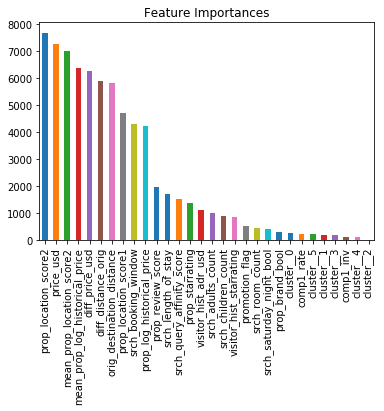

In [7]:
feat_imp = pd.Series(bst.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')


In [8]:
y_pred = bst.predict(xgmat_test)

In [9]:
predictions = [round(value) for value in y_pred]
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred'] = y_pred

In [10]:
def getLog(x):
    return math.log(x+1,2)
def getScore(df):
    df['rank_srch_id'] = df.groupby('srch_id').cumcount().add(1)
    
    df['gain'] = 5*df['booking_bool']
    df['gain'] = np.where(df['gain'] == 0, df['click_bool'], df['gain'])
    df['log_rank'] = df['rank_srch_id'].apply(getLog)
    
    df['g/rank'] = df['gain']/df['log_rank']
    gi_sum = df['g/rank'].sum()

    df['gain_sorted'] = list(df[['srch_id', 'booking_bool', 'click_bool', 'gain']].sort_values(by = ['srch_id','booking_bool','click_bool'], ascending = [True, False, False])['gain'])
    df['g/rank_sorted'] = df['gain_sorted']/df['log_rank']
    gi_sorted_sum = df['g/rank_sorted'].sum()
    
    score = gi_sum/gi_sorted_sum

    return score, gi_sum, gi_sorted_sum

In [11]:
score, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred'], ascending = [True, False]).reset_index(drop=True))
print(score)

# evaluate predictions
accuracy = accuracy_score(df['click_bool'], predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.5067921243612238
Accuracy: 70.82%


In [12]:
f=open("scores.txt", "a+")
f.write("Score: "+str(score)+"\n")
f.write("Label to predict: "+str(labelToPredict)+"\n")
f.write("Features used:\n")
f.write(str(list(featuresToUse)) +"\n")
f.write("Parameters xgboost:\n")
f.write(str(json.dumps(param))+"\n")
f.write("Number of rounds:\n"+str(num_round)+"\n")
f.close()

TypeError: Object of type 'DMatrix' is not JSON serializable

In [13]:
os.rename(nameOfModel+".model",nameOfModel+str(int(score*100))+".model")
newNameOfModel = nameOfModel+str(int(score*100))

Lets combine the models

In [3]:
clickingModel = xgboost.Booster()
clickingModel.load_model('models/10mayClicking50074.model')
bookingModel = xgboost.Booster()
bookingModel.load_model("models/9mayBooking74.model")

In [4]:
df = pd.read_csv('../data/20PercentTestWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

In [5]:
xgmat_test = xgboost.DMatrix( df)
y_pred_clicking = clickingModel.predict(xgmat_test)
y_pred_booking = bookingModel.predict(xgmat_test)

In [6]:
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred_clicking'] = y_pred_clicking
df['y_pred_booking'] = y_pred_booking
df['combined'] = y_pred_booking+y_pred_clicking

In [9]:
score_apart, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred_booking', 'y_pred_clicking'], ascending = [True, False,False]).reset_index(drop=True))
score_combined, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'combined'], ascending = [True, False]).reset_index(drop=True))
print("Sort first on booking and then on clicking: "+str(score_apart))
print("Combine then sort: "+str(score_combined))

Sort first on booking and then on clicking: 0.7482338410691464
Combine then sort: 0.7518651972072667


Evaluation

In [3]:
dfTest = pd.read_csv("../data/testWithMean.csv")

In [4]:
clickingModel = xgboost.Booster()
clickingModel.load_model("models/10mayClickingOverFitTest50.model")
#bookingModel = xgboost.Booster()
#bookingModel.load_model("models/9mayBooking74.model")

In [5]:
xgmat_test_submission = xgboost.DMatrix(dfTest[featuresToUse])
y_pred_clicking = clickingModel.predict(xgmat_test_submission)
#_pred_booking = bookingModel.predict(xgmat_test_submission)
dfTest['predictedPos'] = y_pred_clicking#+y_pred_booking
dfTest = dfTest.sort_values(['srch_id','predictedPos'],ascending=[True, False])
dfSubmission = dfTest[['srch_id','prop_id']]
dfSubmission.to_csv("submissionTest10yFinal.csv",index=False)